# knowcode description 추출하기
: knowcode에 대한 설명이 담겨있는 pdf를 읽어와서 그것을 데이터 프레임으로 만듭니다. 

# 라이브러리 임포트 및 path 설정

In [1]:
# 라이브러리 임포트하기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from glob import glob
import warnings
from tqdm import tqdm_notebook

# 데이터가 담겨있는 path로 설정하기
ab_path = os.path.abspath(os.pardir)
mypath = ab_path + '\\data_0105'
os.chdir(mypath)

warnings.filterwarnings(action='ignore') 
pd.options.display.max_columns=None
know_train = [pd.read_csv(path) for path in sorted(glob('./train/*.csv'))]
know_test = [pd.read_csv(path) for path in sorted(glob('./test/*.csv'))]

# 데이터 Overview

In [2]:
know_train[0].head(2)
# 전부 다 전처리가 잘 되어있고, test_response와 major를 잘 처리해주어야 한다

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,aq6_1,aq6_2,aq7_1,aq7_2,aq8_1,aq8_2,aq9_1,aq9_2,aq10_1,aq10_2,aq11_1,aq11_2,aq12_1,aq12_2,aq13_1,aq13_2,aq14_1,aq14_2,aq15_1,aq15_2,aq16_1,aq16_2,aq17_1,aq17_2,aq18_1,aq18_2,aq19_1,aq19_2,aq20_1,aq20_2,aq21_1,aq21_2,aq22_1,aq22_2,aq23_1,aq23_2,aq24_1,aq24_2,aq25_1,aq25_2,aq26_1,aq26_2,aq27_1,aq27_2,aq28_1,aq28_2,aq29_1,aq29_2,aq30_1,aq30_2,aq31_1,aq31_2,aq32_1,aq32_2,aq33_1,aq33_2,aq34_1,aq34_2,aq35_1,aq35_2,aq36_1,aq36_2,aq37_1,aq37_2,aq38_1,aq38_2,aq39_1,aq39_2,aq40_1,aq40_2,aq41_1,aq41_2,bq1,bq2,bq3,bq4,bq5,bq5_1,bq6,bq7,bq8_1,bq8_2,bq8_3,bq9,bq10,bq11,bq12_1,bq12_2,bq12_3,bq12_4,bq12_5,bq13,bq14,bq15_1,bq15_2,bq15_3,bq16,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq19,bq20,bq21,bq22,bq23,bq24_1,bq24_2,bq24_3,bq24_4,bq24_5,bq24_6,bq24_7,bq24_8,bq25,bq26,bq27,bq28,bq29,bq35,bq36,bq37,bq38,bq39_1,bq39_2,bq40,bq41_1,bq41_2,bq41_3,knowcode,text_response,major
0,0,3,3,3,3,3,3,4,4,3,4,3,3,2,2,2,2,2,2,3,3,3,3,4,4,3,3,3,2,3,3,5,6,5,6,4,5,2,2,5,6,3,4,4,5,3,4,4,4,2,2,3,4,4,5,3,4,1,0,2,2,3,3,1,0,2,2,2,5,3,4,3,4,2,2,2,2,5,2,2,2,2,2,3,1,6,1,1,2,5,2,4,3,3,4,4,3,4,3,4,4,4,4,3,2,4,3,2,2,4,4,2,3,2,3,3,2,2,3,5,10,1,1,1,2,2,2,2,2,3,3,4,3,2,4,1,52,2,1,1,1,4000,0,2200,825101,자동차도장기능사 실무교육 생산 설비 자동화 없다 없다 건설현장 노무직 없다,실업
1,1,4,5,4,5,3,4,3,4,3,4,1,0,1,0,1,0,1,0,2,3,3,4,3,4,4,5,2,2,3,4,3,4,3,4,3,4,1,0,2,3,1,0,3,4,3,4,2,3,1,0,3,4,2,3,3,4,1,0,1,0,3,4,1,0,3,4,3,4,1,0,3,4,3,4,3,4,2,2,1,0,1,0,13,1,3,1,2,0,6,5,4,3,3,4,4,2,3,3,4,4,3,3,3,2,3,3,4,3,4,2,2,4,2,2,4,2,3,3,6,50,2,2,2,2,2,2,2,2,4,3,4,3,2,2,1,38,4,1,1,1,0,0,2400,140204,건축전기설비기술사 건설 수주 없다 드라이버 가위,건축공학


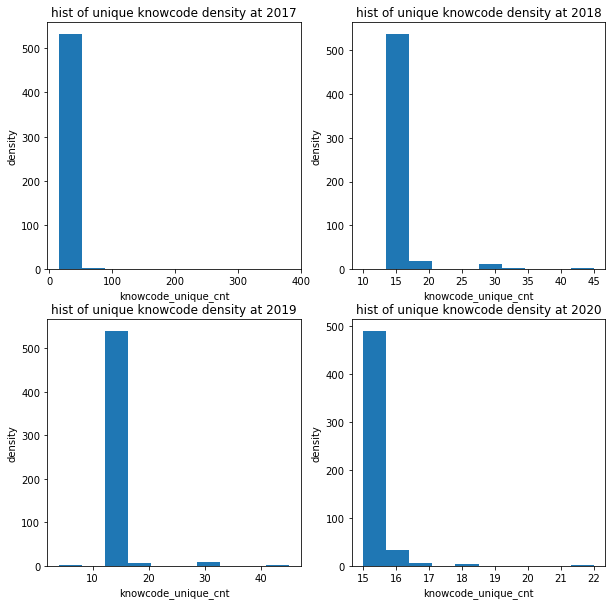

In [3]:
# knowcode의 분포를 보았는데 적은 unique value가 많아 자르기 쉽지않다
years = ['2017','2018','2019','2020']

plt.figure(figsize=(10,10))
for idx in range(len(years)):
    hist_df = pd.DataFrame(know_train[idx]['knowcode'].value_counts()).sort_values(by='knowcode',ascending=False)
    plt.subplot(2,2,idx+1)
    plt.hist(hist_df['knowcode'])
    plt.xlabel('knowcode_unique_cnt')
    plt.ylabel('density')
    plt.title('hist of unique knowcode density at {}'.format(years[idx]))

# PDF 불러오고 가공하기
> pip3 install pdfminer.six 를 터미널에 쳐서 다운로드 해주세요~

In [4]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(file):
    # pdf 리소스 매니저 객체 생성
    rsrcmgr = PDFResourceManager()
    
    # 문자열 데이터를 파일처럼 처리하는 STRINGIO -> PDF 파일 내용이 여기 담긴다
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec = codec, laparams = laparams)
    fp = open(file,'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ''
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp,pagenos, maxpages=maxpages, password=password):
        interpreter.process_page(page)
    # text에 결과가 담김
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    
    return text

In [5]:
raw_pdf_2017 = convert_pdf_to_txt('../data_0103/KNOW 메타데이터/2017_변수값.pdf')
raw_pdf_2018 = convert_pdf_to_txt('../data_0103/KNOW 메타데이터/2018_변수값.pdf')
raw_pdf_2019 = convert_pdf_to_txt('../data_0103/KNOW 메타데이터/2019_변수값.pdf')
raw_pdf_2020 = convert_pdf_to_txt('../data_0103/KNOW 메타데이터/2020_변수값.pdf')

In [6]:
def extract_clean_knowcode_pdf(pdf_text, verbose=False):
    split_list = pdf_text[48:].split('\n\n')
    pdf_df = pd.DataFrame(index=range(len(split_list)))

    for idx in range(len(split_list)):
        string_list = split_list[idx].split(maxsplit=1) # 첫번째로 등장하는 공백을 기준으로 한 번만 split 한다
        if (len(string_list) == 2): # split한 리스트의 길이가 2이여야 하고
            try: 
                knowcode = re.match('[0-9]+', string_list[0]) # 첫 번째 원소가 숫자로만 이루어져 있어야 한다
                pdf_df.loc[idx,'knowcode'] = knowcode.group()
                pdf_df.loc[idx,'description'] = string_list[1]
            except:
                if verbose == True:
                    print('조건 에러 :',string_list) # 오류인 것은 수동으로 체크해야합니다
        else:
            if verbose == True:
                print('길이 에러 :',idx,'번 인덱스=>',string_list) # 오류인 것은 수동으로 체크해야합니다
    return pdf_df 


In [7]:
# 2017년 pdf
pdf_2017 = extract_clean_knowcode_pdf(raw_pdf_2017, verbose=False)

# 사소한 오류는 print로 확인하고 수동으로 조정하자    
pdf_2017.loc[797,'knowcode'] = '08562'
pdf_2017.loc[797,'description'] = '프린팅운영전문가'

# dropna 및 오류인 행 drop
pdf_2017 = pdf_2017.dropna().reset_index(drop=True)
pdf_2017 = pdf_2017.drop(range(1170,pdf_2017.shape[0]))
pdf_2017['knowcode'] = pdf_2017['knowcode'].map(int)

In [8]:
# 2018년 pdf
pdf_2018 = extract_clean_knowcode_pdf(raw_pdf_2018, verbose=False)

# dropna 및 오류인 행 drop 
pdf_2018 = pdf_2018.dropna().reset_index(drop=True)
pdf_2018 = pdf_2018.drop(range(1137,pdf_2018.shape[0]))
pdf_2018['knowcode'] = pdf_2018['knowcode'].map(int)

In [9]:
# 2019년 pdf
pdf_2019 = extract_clean_knowcode_pdf(raw_pdf_2019, verbose=False)

# 사소한 오류는 print로 확인하고 수동으로 조정하자  
pdf_2019.loc[670,'knowcode'] = '133901'
pdf_2019.loc[670,'description'] = 'IT 테스터 및 IT QA 전문가(SW 테스터)'
pdf_2019.loc[685,'knowcode'] = '134303'
pdf_2019.loc[685,'description'] = 'IT 기술지원 전문가'
pdf_2019.loc[764,'knowcode'] = '159103'
pdf_2019.loc[764,'description'] = '3D 프린팅모델러'
pdf_2019.loc[887,'knowcode'] = '415504'
pdf_2019.loc[887,'description'] = 'UX/UI 디자이너'

# dropna 및 오류인 행 drop
pdf_2019 = pdf_2019.dropna().reset_index(drop=True)
pdf_2019 = pdf_2019.drop(range(1138,pdf_2019.shape[0]))
pdf_2019['knowcode'] = pdf_2019['knowcode'].map(int)

In [10]:
# 2020년 pdf
pdf_2020 = extract_clean_knowcode_pdf(raw_pdf_2020, verbose=False)

# 사소한 오류는 print로 확인하고 수동으로 조정하자  
pdf_2020.loc[659,'knowcode'] = '20324'
pdf_2020.loc[659,'description'] = 'IT 테스터 및 IT QA 전문가(SW 테스터)'
pdf_2020.loc[667,'knowcode'] = '20296'
pdf_2020.loc[667,'description'] = 'IT 기술지원 전문가'
pdf_2020.loc[736,'knowcode'] = '08562'
pdf_2020.loc[736,'description'] = '3D 프린팅모델러'
pdf_2020.loc[845,'knowcode'] = '08558'
pdf_2020.loc[845,'description'] = 'UX/UI 디자이너'

# dropna 및 오류인 행 drop
pdf_2020 = pdf_2020.dropna().reset_index(drop=True)
pdf_2020 = pdf_2020.drop(range(1074,pdf_2020.shape[0]))
pdf_2020['knowcode'] = pdf_2020['knowcode'].map(int)

# knowcode description 추가하기

In [24]:
def fix_bug_in_pdf_ver2_df(pdf_df):
    
    pdf_df = pdf_df.drop_duplicates()

    value_cnt_series = pdf_df['knowcode'].value_counts()
    duplicated_knowcode = [knowcode for knowcode in value_cnt_series.index if value_cnt_series.loc[knowcode] == 2]

    error_df = pd.DataFrame()
    for knowcode in duplicated_knowcode:
        error_tmp_df = pdf_df[pdf_df['knowcode']==knowcode]
        error_df = pd.concat([error_df,error_tmp_df])

    total_indice = error_df.index
    even_indice = [even_idx for even_idx in range(0,error_df.shape[0],2)]
    one_indice = [1]*len(even_indice)
    odd_indice = [even_indice[i] + one_indice[i] for i in range(len(even_indice))]

    even_df = error_df.iloc[even_indice,:].reset_index()
    odd_df = error_df.iloc[odd_indice,:].reset_index()

    modified_df = pd.DataFrame(index = range(len(even_indice)))
    modified_df['knowcode'] = even_df['knowcode']
    modified_df['even_description'] = even_df['description']
    modified_df['odd_description'] = odd_df['description']
    modified_df['description'] = modified_df['even_description'].str.cat(modified_df['odd_description'], sep=' ')

    modified_pdf_df = pdf_df.drop(total_indice)
    modified_pdf_df = pd.concat([modified_pdf_df, modified_df[['knowcode','description']]]).reset_index(drop=True)
    
    error_indice = [list(modified_pdf_df[modified_pdf_df['knowcode']==knowcode].index)[0] for knowcode in duplicated_knowcode]
    modified_pdf_df['error'] = 0
    modified_pdf_df.loc[error_indice,'error'] = 1
    
    return modified_pdf_df

In [23]:
def fix_bug_in_pdf_ver2_df(pdf_df):
    
    pdf_df = pdf_df.drop_duplicates()

    value_cnt_series = pdf_df['knowcode'].value_counts()
    duplicated_knowcode = [knowcode for knowcode in value_cnt_series.index if value_cnt_series.loc[knowcode] == 2]

    error_df = pd.DataFrame()
    for knowcode in duplicated_knowcode:
        error_tmp_df = pdf_df[pdf_df['knowcode']==knowcode]
        error_df = pd.concat([error_df,error_tmp_df])

    total_indice = error_df.index
    even_indice = [even_idx for even_idx in range(0,error_df.shape[0],2)]
    one_indice = [1]*len(even_indice)
    odd_indice = [even_indice[i] + one_indice[i] for i in range(len(even_indice))]

    even_df = error_df.iloc[even_indice,:].reset_index()
    odd_df = error_df.iloc[odd_indice,:].reset_index()

    modified_df = pd.DataFrame(index = range(len(even_indice)))
    modified_df['knowcode'] = even_df['knowcode']
    modified_df['even_description'] = even_df['description']
    modified_df['odd_description'] = odd_df['description']
    modified_df['description'] = modified_df['even_description'].str.cat(modified_df['odd_description'], sep=' ')

    modified_pdf_df = pdf_df.drop(total_indice)
    modified_pdf_df = pd.concat([modified_pdf_df, modified_df[['knowcode','description']]]).reset_index(drop=True)
    
    return modified_pdf_df

In [25]:
pdf_list = [pdf_2017, pdf_2018, pdf_2019, pdf_2020]
years = ['2017', '2018', '2019', '2020']

for idx in range(4):
    modified_pdf_df = fix_bug_in_pdf_ver2_df(pdf_list[idx])
    modified_pdf_df.to_csv('pdf_description_{}.csv'.format(years[idx]), index=False)